*Loading the dataset*

In [1020]:
import pandas as pd, numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U scikit-learn
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


In [1021]:
df=pd.read_csv('./insurance.csv')
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [1022]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [1023]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*EDA*

In [1024]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

settings for better visualization

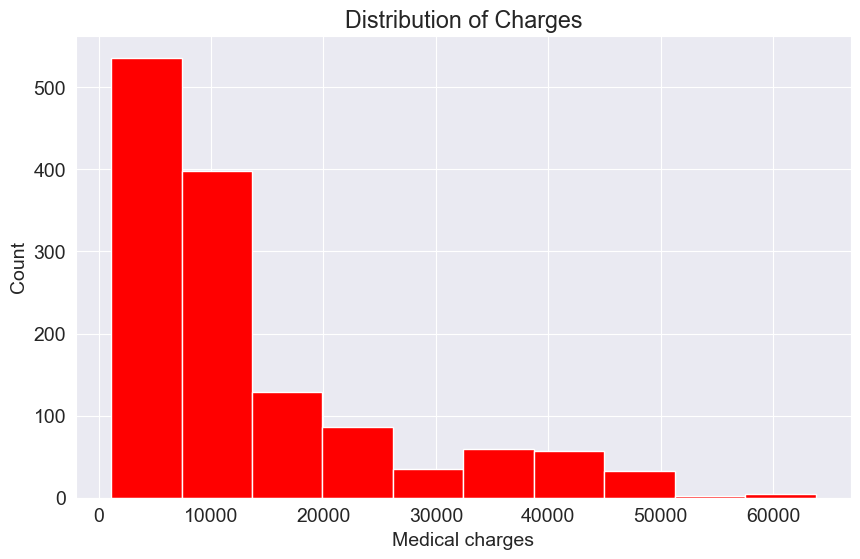

In [1025]:
df['charges'].hist(bins=10, color='red')
plt.xlabel("Medical charges")
plt.ylabel("Count")
plt.title("Distribution of Charges")
plt.show()

In [1026]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1027]:
df.dtypes
numeric_cols=df.select_dtypes(include=np.number).columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()

In [1028]:
numeric_cols

['age', 'bmi', 'children', 'charges']

In [1029]:
for cols in ['sex', 'smoker', 'region']:
    print(f"\n{cols} unique values:", df[cols].unique())


sex unique values: ['female' 'male']

smoker unique values: ['yes' 'no']

region unique values: ['southwest' 'southeast' 'northwest' 'northeast']


In [1030]:
numeric_cols

['age', 'bmi', 'children', 'charges']

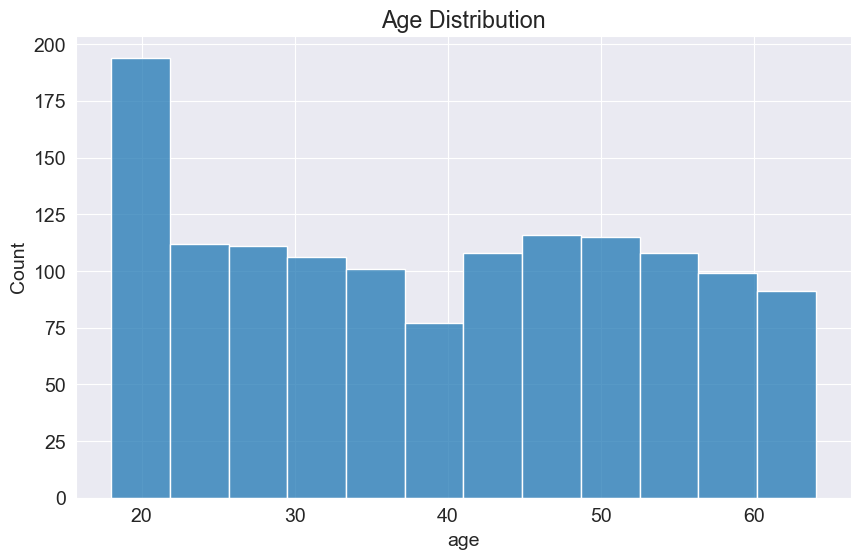

In [1031]:
sns.histplot(data=df,x='age')
plt.title('Age Distribution')
plt.show()

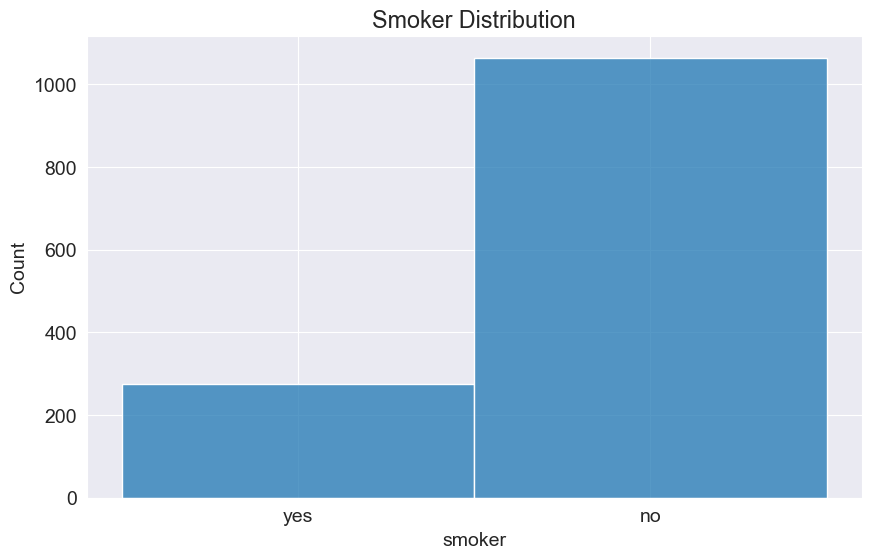

In [1032]:
sns.histplot(data=df,x='smoker')
plt.title('Smoker Distribution')
plt.show()

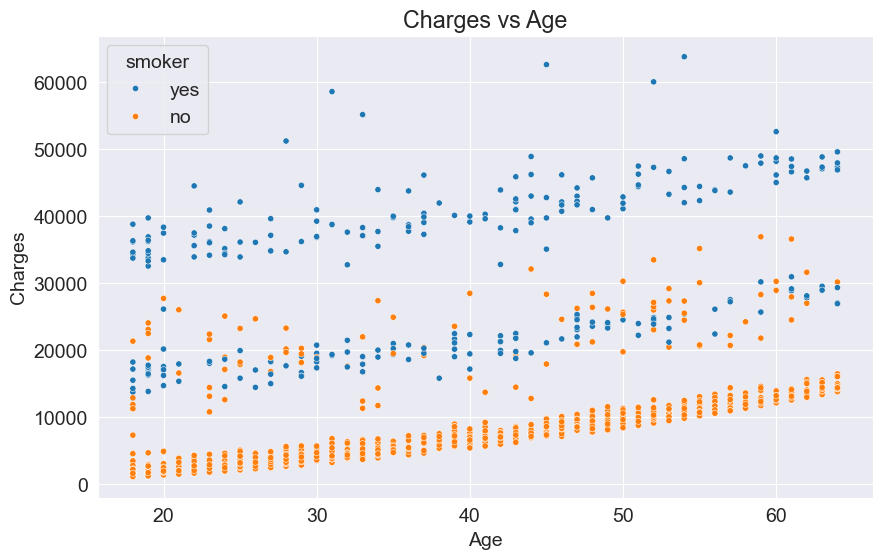

In [1033]:
sns.scatterplot(data=df, x='age', y='charges', alpha=1,s=20, hue='smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

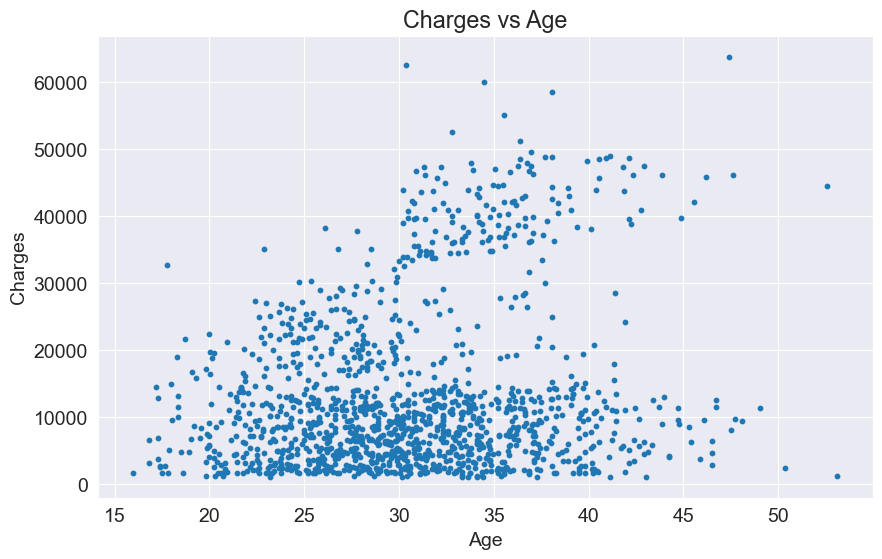

In [1034]:
plt.scatter(data=df, x='bmi', y='charges', s=10)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges vs Age')
plt.show()

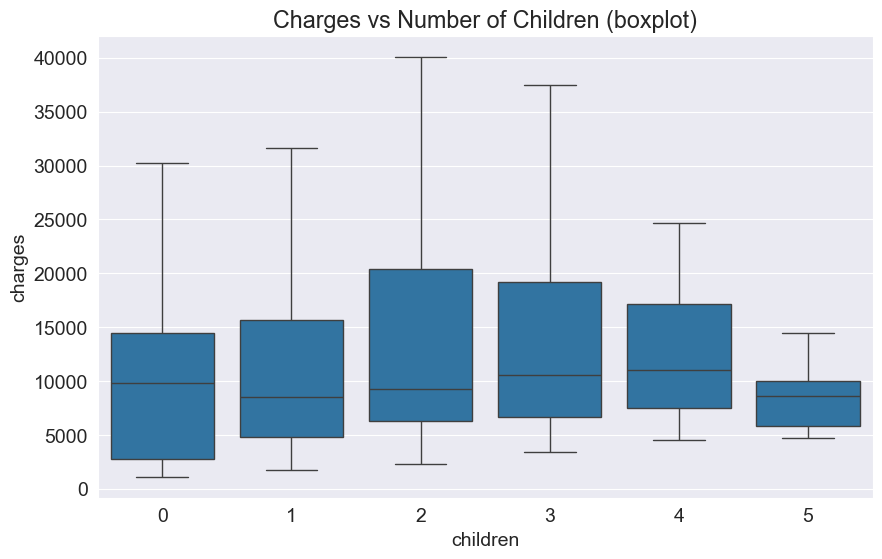

In [1035]:
import seaborn as sns
sns.boxplot(data=df, x='children', y='charges', showfliers=False)
plt.title("Charges vs Number of Children (boxplot)")
plt.show()


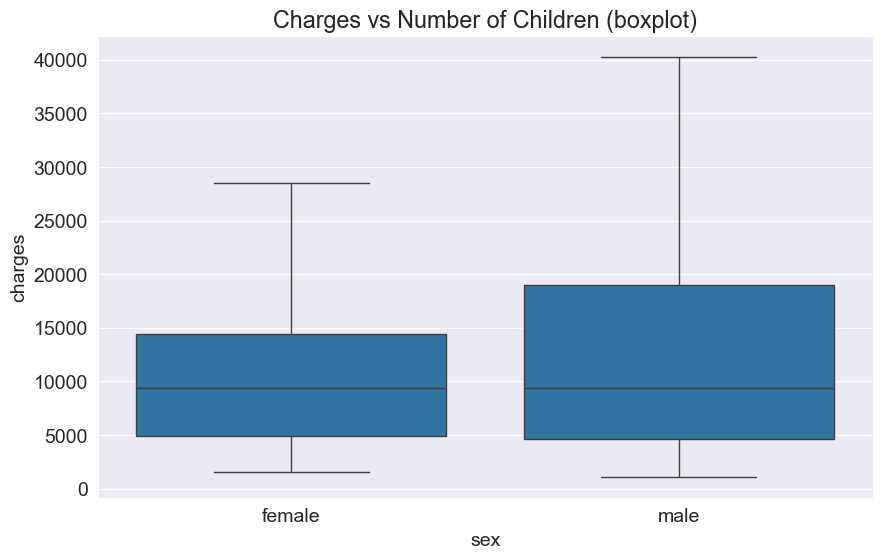

In [1036]:
import seaborn as sns
sns.boxplot(data=df, x='sex', y='charges', showfliers=False)
plt.title("Charges vs Number of Children (boxplot)")
plt.show()


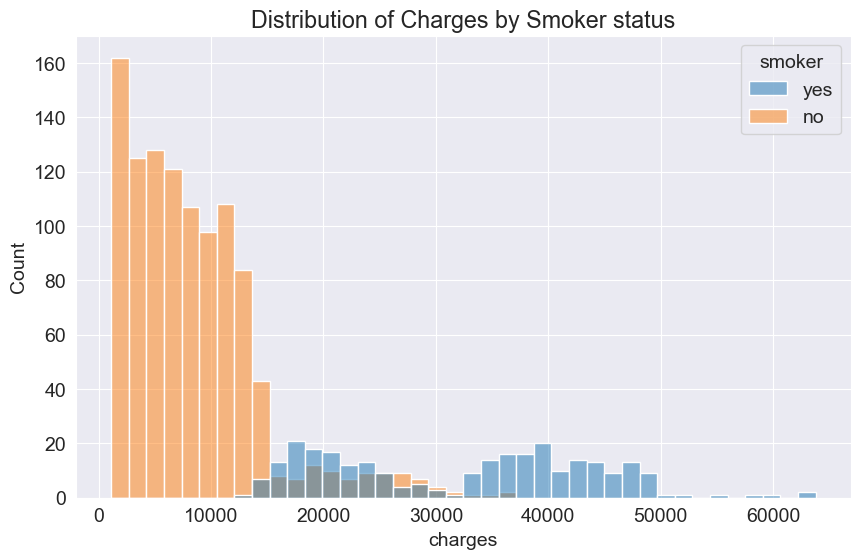

In [1037]:
sns.histplot(data=df, x='charges', hue='smoker', bins=40)
plt.title("Distribution of Charges by Smoker status")
plt.show()


In [1038]:
corr=df[numeric_cols].corr()
print(corr)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


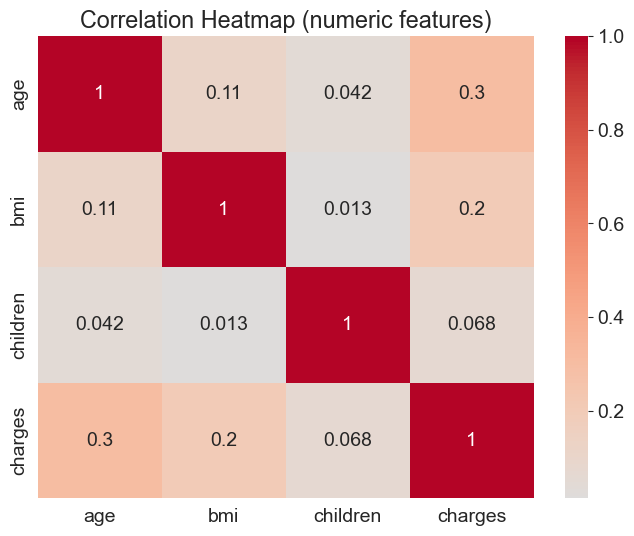

In [1039]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True,cmap="coolwarm",center=0)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

In [1040]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

np.float64(0.7872514304984772)

In [1041]:
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

*Train and Test split*

In [1042]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(df,test_size=0.2,random_state=49)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=49)
print(f"Size of Train_df if {train_df.shape}")
print(f"Size of val_df if {val_df.shape}")
print(f"Size of Test_df if {test_df.shape}")

Size of Train_df if (802, 7)
Size of val_df if (268, 7)
Size of Test_df if (268, 7)


*Inputs and Targets*

In [1043]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1044]:
input_cols=df.columns.tolist()[0:-1]
target_cols='charges'


In [1045]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()

In [1046]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()

In [1047]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_cols].copy()

In [1048]:
train_df.head()

,age,sex,bmi,children,smoker,region,charges
648,18,male,28.5,0,no,northeast,1712.22700
43,37,female,30.8,2,no,southeast,6313.75900
382,55,male,33.0,0,no,southeast,20781.48892
1247,33,male,29.4,4,no,southwest,6059.17300
817,23,male,37.1,3,no,southwest,3597.59600


*Scaling and OneHotEncoding*

In [1049]:
numeric_cols.remove(target_cols)

In [1050]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [1051]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore').fit(train_df[cat_cols])
encoded_cols=list(encoder.get_feature_names_out(cat_cols))
scaler=StandardScaler().fit(train_df[numeric_cols])

In [1052]:
len(encoded_cols)

5

In [1053]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [1054]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[cat_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[cat_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[cat_cols])

In [1055]:
train_inputs.drop(cat_cols,axis=1,inplace=True)
val_inputs.drop(cat_cols,axis=1,inplace=True)
test_inputs.drop(cat_cols,axis=1,inplace=True)

*Train and Evaluate the models*

In [1056]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [1057]:
def fit_LinReg(train_inputs,train_targets):
    model=LinearRegression()
    model.fit(train_inputs,train_targets)
    return model

In [1058]:
def evaluate(model,inputs,targets, name=''):
    prediction=model.predict(inputs)
    mae=mean_absolute_error(targets,prediction)
    rmse=np.sqrt(mean_squared_error(targets,prediction))
    r2=r2_score(targets,prediction)
    print(f"[{name}] MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

In [1059]:
linReg=fit_LinReg(train_inputs,train_targets)
train_metrics=evaluate(linReg,train_inputs,train_targets,'train data')
val_metrics=evaluate(linReg,val_inputs,val_targets,'Validation data')

[train data] MAE: 4084.49 | RMSE: 5912.15 | R²: 0.7403
[Validation data] MAE: 4566.64 | RMSE: 6618.66 | R²: 0.7542


*Model training and Evaluation*

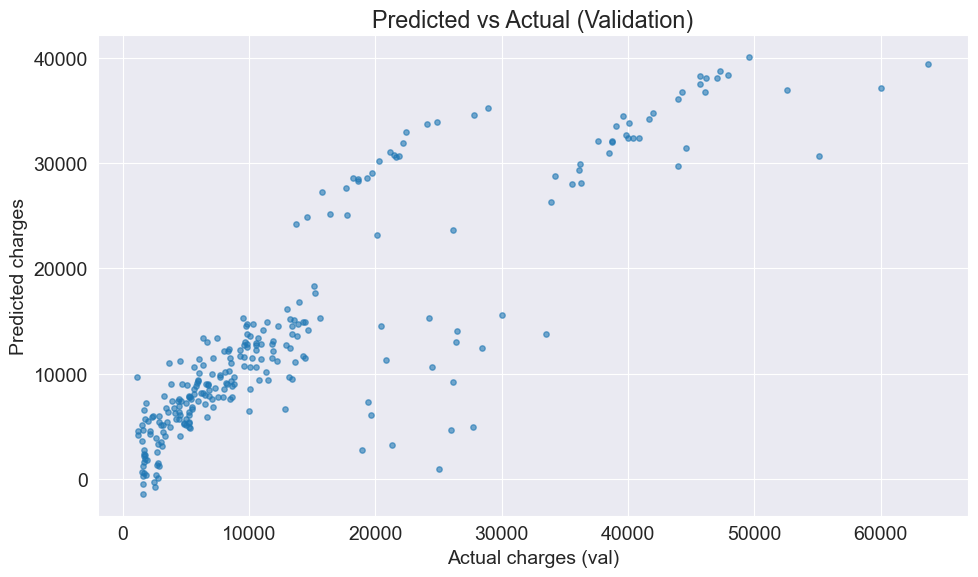

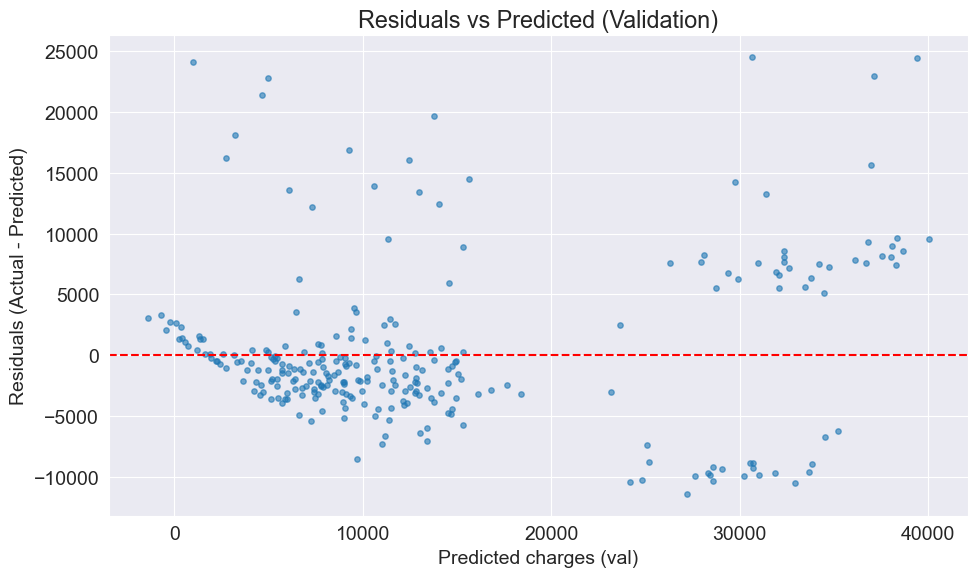

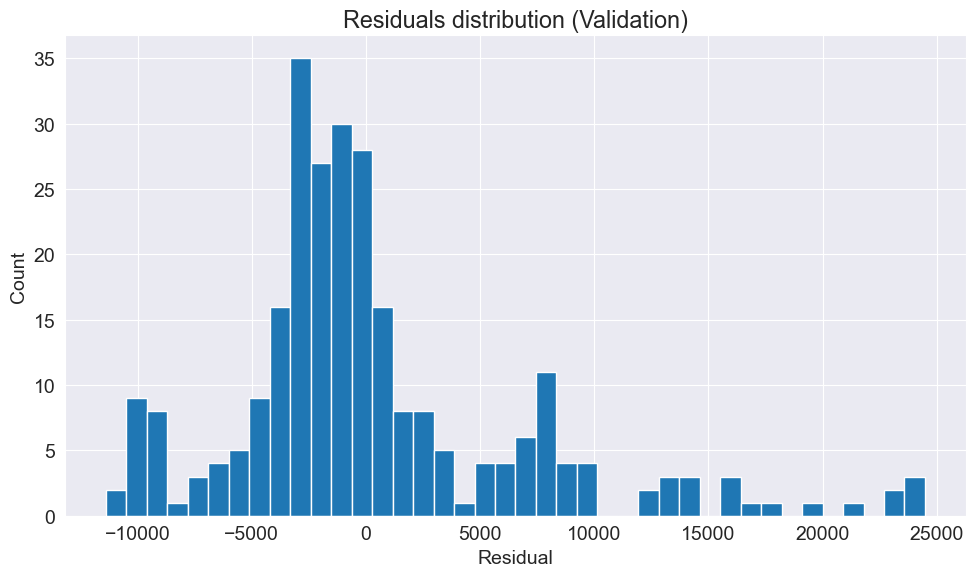

In [1060]:
val_preds  = linReg.predict(val_inputs)
val_resid  = val_targets - val_preds


plt.figure()
plt.scatter(val_targets, val_preds, s=15, alpha=0.6)
plt.xlabel("Actual charges (val)")
plt.ylabel("Predicted charges")
plt.title("Predicted vs Actual (Validation)")
plt.tight_layout(); plt.show()

plt.figure()
plt.scatter(val_preds, val_resid, s=15, alpha=0.6)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted charges (val)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted (Validation)")
plt.tight_layout(); plt.show()

plt.figure()
plt.hist(val_resid, bins=40)
plt.title("Residuals distribution (Validation)")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout(); plt.show()


*log transformation on targets*

In [1061]:
y_train_log = np.log(train_targets)
y_val_log   = np.log(val_targets)

log_linreg = LinearRegression()
log_linreg.fit(train_inputs, y_train_log)

val_preds_log = log_linreg.predict(val_inputs)
val_preds = np.exp(val_preds_log)   # <-- no smearing

mae  = mean_absolute_error(val_targets, val_preds)
rmse = (np.sqrt(mean_squared_error(val_targets, val_preds)))
r2   = r2_score(val_targets, val_preds)

print(f"[Log-Linear No-Smear] MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")


[Log-Linear No-Smear] MAE: 4322.34 | RMSE: 8124.26 | R²: 0.6296


*Linear transformation did not do well on log transforms*

In [1062]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-3, 3, 20)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(train_inputs, train_targets)
print("Best alpha (Ridge):", ridge.alpha_)
train_preds = ridge.predict(train_inputs)
val_preds   = ridge.predict(val_inputs)
print("Train R²:", np.sqrt(mean_squared_error(train_targets, train_preds)))
print("Val   R²:", r2_score(val_targets, val_preds))


Best alpha (Ridge): 2.976351441631316
Train R²: 5916.058041859566
Val   R²: 0.7513578027379528


In [1063]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso.fit(train_inputs, train_targets)
print("Best alpha (Lasso):", lasso.alpha_)
train_preds = lasso.predict(train_inputs)
val_preds   = lasso.predict(val_inputs)
print("Train R²:", r2_score(train_targets, train_preds))
print("Val   R²:", r2_score(val_targets, val_preds))


Best alpha (Lasso): 1.438449888287663
Train R²: 0.7402829674472708
Val   R²: 0.754199579447427


In [1064]:
lasso.coef_

array([ 3393.92186909,  1958.88501122,   684.70209871,   464.54444176,
       23250.52432305, -1218.67347796, -1443.03403376, -1094.10869664])

In [1065]:
ridge.coef_


array([ 3372.73859323,  1944.54827929,   679.31999766,   485.67614139,
       22727.72630584, -1183.55040055, -1375.06060085, -1050.51351987])

In [1066]:
base_Lin_Reg=fit_LinReg(train_inputs,train_targets)
base_Lin_Reg.coef_

array([ 3395.43802946,  1961.8616033 ,   685.9737353 ,   469.39188787,
       23259.34557079, -1242.32917498, -1468.87019623, -1119.04099974])

In [1067]:
df[numeric_cols].columns

Index(['age', 'bmi', 'children'], dtype='object')

In [1068]:
train_inputs.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [1069]:
coef_df = pd.DataFrame({
    "Feature": train_inputs.columns,
    "Baseline": base_Lin_Reg.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

In [1070]:
coef_df.sort_values('Baseline',ascending=False)

,Feature,Baseline,Ridge,Lasso
4,smoker_yes,23259.345571,22727.726306,23250.524323
0,age,3395.438029,3372.738593,3393.921869
1,bmi,1961.861603,1944.548279,1958.885011
2,children,685.973735,679.319998,684.702099
3,sex_male,469.391888,485.676141,464.544442
7,region_southwest,-1119.041000,-1050.513520,-1094.108697
5,region_northwest,-1242.329175,-1183.550401,-1218.673478
6,region_southeast,-1468.870196,-1375.060601,-1443.034034


*Our BaseLine OLS model performed the best among all*

In [1071]:
full_train_inputs=pd.concat([train_inputs,val_inputs])
full_train_targets=pd.concat([train_targets,val_targets])
linReg=fit_LinReg(full_train_inputs,full_train_targets)
train_metrics=evaluate(linReg,full_train_inputs,full_train_targets,'train data')
test_metrics=evaluate(linReg,test_inputs,test_targets,'test data')

[train data] MAE: 4213.08 | RMSE: 6079.05 | R²: 0.7462
[test data] MAE: 4134.77 | RMSE: 5917.07 | R²: 0.7665


In [1084]:
coef_sorted=pd.DataFrame({
    'Features':full_train_inputs.columns,
    'Coef of Base Model':linReg.coef_
}).sort_values('Coef of Base Model',ascending=False)

In [1085]:
coef_sorted

,Features,Coef of Base Model
4,smoker_yes,23924.646186
0,age,3472.413594
1,bmi,2161.304123
2,children,675.766878
3,sex_male,148.154379
5,region_northwest,-562.892415
7,region_southwest,-1116.189057
6,region_southeast,-1424.700900


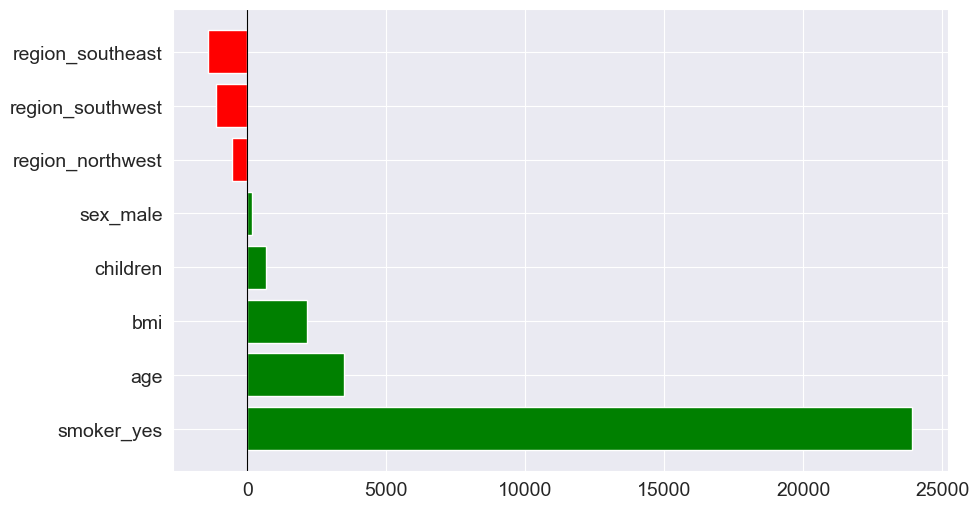

In [1096]:
colors = ["green" if c > 0 else "red" for c in coef_sorted["Coef of Base Model"]]
plt.barh(coef_sorted['Features'],coef_sorted["Coef of Base Model"],color=colors)
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

*Taking new Customer input*

In [1100]:
import joblib
joblib.dump(linReg, "linear_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

In [1101]:
model = joblib.load("linear_model.pkl")
scaler = joblib.load("scaler.pkl")
encoder = joblib.load("encoder.pkl")

In [1119]:
new_customer = pd.DataFrame([{
    "age": 35,
    "sex": "male",
    "bmi": 28.5,
    "children": 2,
    "smoker": "yes",
    "region": "southeast"
}])

In [1120]:
new_customer.head()

,age,sex,bmi,children,smoker,region
0,35,male,28.5,2,yes,southeast


In [1112]:
new_customer[numeric_cols] = scaler.transform(new_customer[numeric_cols])
new_customer[encoded_cols] = encoder.transform(new_customer[cat_cols])


In [1114]:
train_inputs.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [1115]:
new_df=new_customer[numeric_cols+encoded_cols]

In [1116]:
predit=model.predict(new_df)

In [1111]:
predit

array([30441.68933735])